In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import rc

In [2]:
N85=np.array([3.96863, 2.82549, 3.04489, 3.3085, 2.8849, 4.07995, 7.97069])
N88=np.array([3.96863, 2.82549, 3.04489, 3.3085, 2.8849, 4.07995, 7.97069])
N95=np.array([3.96863, 2.82549, 3.04489, 3.3085, 2.8849, 4.07995, 7.97069, 2.89264])
N100=np.array([3.96863, 2.82549, 3.04489, 3.3085, 2.8849, 4.07995, 7.97069, 2.89264, 3.33693])
N=np.array([3.96863, 2.82549, 3.04489, 3.3085, 2.8849, 4.07995, 7.97069, 2.89264, 3.33693, 3.97197])
r=0.418
L=59.7

In [3]:
msD85=([5, 15, 20, 25, 30, 35, 40])
alpha85=np.array([0.0527, 0.0371, 0.038, 0.0313, 0.0415, 0.0557, 0.0448])
alpha85err=np.array([0.00223, 0.00189, 0.00191, 0.00174, 0.00199, 0.00229, 0.00207])
Br85=np.array([0.991335, 0.9896576, 0.9876927, 0.9840724, 0.9764805, 0.9552091, 0.8184361])

msD88=([5, 15, 20, 25, 30, 35, 40])
alpha88=np.array([0.0622, 0.0568, 0.0454, 0.04, 0.047, 0.0721, 0.0707])
alpha88err=np.array([0.00242, 0.00231, 0.00208, 0.00196, 0.00212, 0.00259, 0.00256])
# Br85=np.array([0.991335, 0.9896576, 0.9876927, 0.9840724, 0.9764805, 0.9552091, 0.8184361])


msD91=([5, 15, 20, 25, 30, 35, 40, 45])
alpha91=np.array([0.085, 0.0709, 0.0612, 0.056, 0.0527, 0.0852, 0.0983, 0.0576])
alpha91err=np.array([0.00279, 0.00257, 0.0024, 0.0023, 0.00223, 0.00279, 0.00298, 0.00233])
Br91=np.array([5.43E-02, 4.69E-02, 4.07E-02, 3.31E-02, 2.44E-02, 1.52E-02, 0.006424469, 2.43E-04])

msD95=([5, 15, 20, 25, 30, 35, 40, 45])
alpha95=np.array([0.102, 0.0883, 0.0772, 0.0776, 0.0785, 0.1, 0.122, 0.105])
alpha95err=np.array([0.00302, 0.00284, 0.00267, 0.00268, 0.00269, 0.003, 0.00327, 0.00307])
Br95=np.array([0.834501, 0.8141195, 0.7927962, 0.7591538, 0.7049769, 0.6130577, 0.4457657, 0.1440122])


msD100=([5, 15, 20, 25, 30, 35, 40, 45, 50])
alpha100=np.array([0.127, 0.12, 0.11 , 0.102, 0.0995, 0.114, 0.14, 0.152, 0.14])
alpha100err=np.array([0.00333, 0.00325, 0.00313, 0.00302, 0.00299, 0.00318, 0.00347, 0.00359, 0.00366])
Br100=np.array([0.9379248, 0.9301459, 0.9219303, 0.9087838, 0.8870511, 0.8481779, 0.7681548, 0.5595414, 5.41E-03])

msD110=([5, 15, 20, 25, 30, 35, 40, 45, 50, 55])
alpha110=np.array([0.159, 0.16, 0.153, 0.149, 0.143, 0.155, 0.18, 0.208, 0.214, 0.258])
alpha110err=np.array([0.00366, 0.00367, 0.0036, 0.00356, 0.0035, 0.00362, 0.00384, 0.00406, 0.0041, 0.00438])
Br110=np.array([0.9683876, 0.9650612, 0.961646, 0.9563687, 0.9480843, 0.9343703, 0.9093251, 0.8549749, 0.6916041, 0.1615622])


msD125=np.array([5, 15, 20, 25, 30, 35, 40, 45, 50, 55])
# , 60
alpha125=np.array([0.206, 0.204, 0.192, 0.189, 0.191, 0.191, 0.218, 0.248, 0.266, 0.27])
# , 0.294
alpha125err=np.array([0.00404, 0.00403, 0.00394, 0.00391, 0.00393, 0.00393, 0.00413, 0.00432, 0.00442, 0.00444])
# , 0.00456
Br125=np.array([0.9777279, 0.9759327, 0.9741557, 0.9715293, 0.9676639, 0.9618408, 0.9526236, 0.9367645, 0.9054284, 0.8260719])
# , 0.4931581


msD130=np.array([5, 15, 20, 25, 30, 35, 40, 45, 50, 55])
#                  , 60, 65])
alpha130=np.array([0.23, 0.219, 0.211, 0.199, 0.2, 0.213, 0.231, 0.257, 0.273, 0.281])
#                 , 0.292,   0.34])
alpha130err=np.array([0.00421, 0.00408, 0.00399, 0.004, 0.004, 0.00409, 0.00422, 0.00437, 0.00446, 0.00449])
#                     , 0.00455, 0.00474])
Br130=np.array([0.9790809, 0.9775282, 0.976006, 0.9737816, 0.9705603, 0.965817, 0.9585505, 0.9466478, 0.924921, 0.8772679])
#                , 0.7287561 , 0.1651773])


msD140=np.array([5, 15, 20, 25, 30, 35, 40, 45, 50, 55])
#                 , 60 , 65, 70])
alpha140=np.array([0.242, 0.233, 0.236, 0.234, 0.236, 0.23, 0.247, 0.273, 0.295, 0.303])
#                  , 0.306  , 0.32, 0.352])
alpha140err=np.array([0.00428, 0.00422, 0.00425, 0.00423, 0.00425, 0.00421, 0.00431, 0.00446, 0.00456, 0.0046])
#                     , 0.00461  , 0.00466, 0.00478])
Br140=np.array([0.980875, 0.9796599, 0.9784877, 0.9768071, 0.9744369, 0.9710722, 0.9661752, 0.9587249, 0.9465698, 0.9244343])
#                ,0.87597050  , 0.7254587, 0.1592373])


msD150=np.array([5, 15, 20, 25, 30, 35, 40, 45, 50, 55])
#               , 60   , 70, 75]) 
alpha150=np.array([0.279, 0.256, 0.255, 0.253, 0.254, 0.259, 0.261, 0.284, 0.314, 0.319])
#                    , 0.327, 0.35, 0.38]) 
alpha150err=np.array([0.00449, 0.00437, 0.00436, 0.00435, 0.00435, 0.00438, 0.00439, 0.00451, 0.00464, 0.00466])
#                    , 0.00469   , 0.00477, 0.00485])
Br150=np.array([0.9820027, 0.9810128, 0.9800702, 0.9787388, 0.9768994, 0.9743601, 0.9742, 0.9656641, 0.9578871, 0.9452407])
#               , 0.003357175  , 0.00071919, 4.67E-05])


msD160=np.array([5, 15, 20, 25, 30, 35, 40, 45, 50, 55])
#                 , 60 , 70, 80]) 
alpha160=np.array([0.289, 0.286, 0.276, 0.274, 0.262, 0.28, 0.282, 0.294, 0.318, 0.333])
#                   , 0.342 , 0.358, 0.394]) 
alpha160err=np.array([0.00453, 0.00452, 0.00447, 0.00446, 0.0044, 0.00449, 0.0045, 0.00456, 0.00466, 0.00497])
#                     , 0.00474  , 0.00479, 0.00489])
Br160=np.array([0.9827719, 0.9819435, 0.9811627, 0.9800734, 0.9785927, 0.9765927, 0.9738698, 0.9700878, 0.9646589, 0.9564723])
#                , 0.9431973 , 0.8668581, 0.1585744])

msD170=np.array([5, 15, 20, 25, 30, 35, 40, 45, 50, 55])
alpha170=np.array([0.309, 0.306, 0.292, 0.3, 0.294, 0.283, 0.285, 0.302, 0.318, 0.345])
alpha170err=np.array([0.00462, 0.00461, 0.00455, 0.00458, 0.00456, 0.00451, 0.00452, 0.00459, 0.00466, 0.00475])
Br170=np.array([0.9833269, 0.9826198, 0.9819592, 0.9810465, 0.9798222, 0.978197, 0.9760339, 0.9731171, 0.9690915, 0.9633376])


msD180=np.array([5, 15, 20, 25, 30, 35, 40, 45, 50, 55])
#                  , 60, 70, 80, 90]) 
alpha180=np.array([0.329, 0.315, 0.317, 0.3, 0.308, 0.3, 0.317, 0.323, 0.343, 0.363])
#                   , 0.364 , 0.375, 0.4, 0.407]) 
alpha180err=np.array([0.0047, 0.00465, 0.00465, 0.00458, 0.00461, 0.00458, 0.00465, 0.00468, 0.00475, 0.00481])
#                      , 0.00481 , 0.00484, 0.0049, 0.00491])
Br180=np.array([0.9837441, 0.9831315, 0.9825632, 0.9817845, 0.9807513, 0.9793988, 0.977631, 0.975302, 0.9721832, 0.9678991])
#                , 0.9617962 , 0.9378756, 0.8539215, 0.158393])

msD180=np.array([5, 15, 20, 25, 30, 35, 40, 45, 50, 55])
#                , 60  , 70, 80, 90]) 
alpha180=np.array([0.329, 0.315, 0.317, 0.3, 0.308, 0.3, 0.317, 0.323, 0.343, 0.363,])
#                    0.364 , 0.375, 0.4, 0.407]) 
alpha180err=np.array([0.0047, 0.00465, 0.00465, 0.00458, 0.00461, 0.00458, 0.00465, 0.00468, 0.00475, 0.00481])
#                      , 0.00481 , 0.00484, 0.0049, 0.00491])
Br180=np.array([0.9837441, 0.9831315, 0.9825632, 0.9817845, 0.9807513, 0.9793988, 0.977631, 0.975302, 0.9721832, 0.9678991])
#                , 0.9617962 , 0.9378756, 0.8539215, 0.158393])


msD190=np.array([5, 15, 20, 25, 30, 35, 40, 45, 50, 55])
#                 , 60 , 70, 80]) 
alpha190=np.array([0.341, 0.332, 0.343, 0.322, 0.327, 0.327, 0.327, 0.329, 0.345, 0.368])
#                   , 0.383 , 0.383, 0.387]) 
alpha190err=np.array([0.00474, 0.00471, 0.00475, 0.00467, 0.00469, 0.00469, 0.00469, 0.0047, 0.00475, 0.00482])
#                       , 0.00486, 0.00486, 0.00487])
Br190=np.array([0.9840678, 0.9835305, 0.9830353, 0.9823613, 0.9814749, 0.9803282, 0.9788511, 0.9769412, 0.9744435, 0.9711158])
#               , 0.9665616  , 0.9504104, 0.9067967])



msD200=np.array([5, 15, 20, 25, 30, 35, 40, 45, 50, 55])
#                 , 60 , 80, 100]) 
alpha200=np.array([0.354, 0.345, 0.358, 0.347, 0.341, 0.331, 0.337, 0.342, 0.352, 0.368])
#                   , 0.373 , 0.407, 0.428]) 
alpha200err=np.array([0.00478, 0.00475, 0.00479, 0.00476, 0.00474, 0.00471, 0.00473, 0.00475, 0.00478, 0.00482])
#                       , 0.00484 , 0.00491, 0.00495]) 
Br200=np.array([0.984, 0.9838494, 0.983, 0.9828227, 0.982, 0.9810651, 0.979, 0.9782093, 0.976, 0.9734875])

In [4]:
a=np.array([1.45e+07, 1.22e+08, 2.40e+08, 6.93e+07, 2.57e+07, 1.23e+07, 1.03e+07, 7.46e+06, 5.72e+06, 4.49e+06, 3.61e+06, 2.92e+06, 2.42e+06, 2.02e+06])

sigBr85=N85/(L*r*alpha85)
# print(sigBr85)
sigBr85err=(N85/(L*r))*(alpha85err/(alpha85*alpha85))
sigBrep85= sigBr85/a[0]
print ('MZD85: ', sigBrep85)


sigBr88=N88/(L*r*alpha88)
# print(sigBr85)
sigBr88err=(N88/(L*r))*(alpha88err/(alpha88*alpha88))
sigBrep88=sigBr88/a[1]
print ('MZD88: ', sigBrep88)


# print(a[0])
# print(sigBrep85)

# sigBr91=N/(L*r*alpha91)
# sigBr91err=(N/(L*r))*(alpha91err/(alpha91*alpha91))

sigBr95=N95/(L*r*alpha95)
sigBr95err=(N95/(L*r))*(alpha95err/(alpha95*alpha95))
sigBrep95=sigBr95/a[2]
print ('MZD95: ', sigBrep95)

sigBr100=N100/(L*r*alpha100)
sigBr100err=(N100/(L*r))*(alpha100err/(alpha100*alpha100))
sigBrep100=sigBr100/a[3]
print ('MZD100: ', sigBrep100)

sigBr110=N/(L*r*alpha110)
sigBr110err=(N/(L*r))*(alpha110err/(alpha110*alpha110))
sigBrep110=sigBr110/a[4]
print ('MZD110: ', sigBrep110)

sigBr125=N/(L*r*alpha125)
sigBr125err=(N/(L*r))*(alpha125err/(alpha125*alpha125))
sigBrep125=sigBr125/a[5]
print ('MZD125: ', sigBrep125)

sigBr130=N/(L*r*alpha130)
sigBr130err=(N/(L*r))*(alpha130err/(alpha130*alpha130))
sigBrep130=sigBr130/a[6]
print ('MZD130: ', sigBrep130)

sigBr140=N/(L*r*alpha140)
sigBr140err=(N/(L*r))*(alpha140err/(alpha140*alpha140))
sigBrep140=sigBr140/a[7]
print ('MZD140: ', sigBrep140)

sigBr150=N/(L*r*alpha150)
sigBr150err=(N/(L*r))*(alpha150err/(alpha150*alpha150))
sigBrep150=sigBr150/a[8]
print ('MZD150: ', sigBrep150)

sigBr160=N/(L*r*alpha160)
sigBr160err=(N/(L*r))*(alpha160err/(alpha160*alpha160))
sigBrep160=sigBr160/a[9]
print ('MZD160: ', sigBrep160)

sigBr170=N/(L*r*alpha170)
sigBr170err=(N/(L*r))*(alpha170err/(alpha170*alpha170))
sigBrep170=sigBr170/a[10]
print ('MZD170: ', sigBrep170)

sigBr180=N/(L*r*alpha180)
sigBr180err=(N/(L*r))*(alpha180err/(alpha180*alpha180))
sigBrep180=sigBr180/a[11]
print ('MZD180: ', sigBrep180)

sigBr190=N/(L*r*alpha190)
sigBr190err=(N/(L*r))*(alpha190err/(alpha190*alpha190))
sigBrep190=sigBr190/a[12]
print ('MZD190: ', sigBrep190)

sigBr200=N/(L*r*alpha200)
sigBr200err=(N/(L*r))*(alpha200err/(alpha200*alpha200))
sigBrep200=sigBr200/a[13]
print ('MZD200: ', sigBrep200)

MZD85:  [2.08118832e-07 2.10475355e-07 2.21446793e-07 2.92124637e-07
 1.92116228e-07 2.02432869e-07 4.91698960e-07]
MZD88:  [2.09575149e-08 1.63393583e-08 2.20295341e-08 2.71681899e-08
 2.01614825e-08 1.85869929e-08 3.70310530e-08]
MZD95:  [6.49648716e-09 5.34282828e-09 6.58555609e-09 7.11881264e-09
 6.13619641e-09 6.81228778e-09 1.09087310e-08 4.59984538e-09]
MZD100:  [1.80697874e-08 1.36153460e-08 1.60064519e-08 1.87562978e-08
 1.67657828e-08 2.06950339e-08 3.29218351e-08 1.10044148e-08
 1.37827289e-08]
MZD110:  [3.89188277e-08 2.75353154e-08 3.10310478e-08 3.46227161e-08
 3.14565428e-08 4.10430292e-08 6.90461834e-08 2.16843953e-08
 2.43136179e-08 2.40050446e-08]
MZD125:  [6.27650192e-08 4.51240304e-08 5.16671677e-08 5.70313445e-08
 4.92086751e-08 6.95930306e-08 1.19119730e-07 3.80002962e-08
 4.08704797e-08 4.79276871e-08]
MZD130:  [6.71312814e-08 5.01951576e-08 5.61437368e-08 6.46830105e-08
 5.61193885e-08 7.45224973e-08 1.34244376e-07 4.37898469e-08
 4.75550466e-08 5.49935559e-08]


<ipython-input-5-3aa81935a349>:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim([0,1.00E-06])
Substituting symbol B from STIXNonUnicode
Substituting symbol B from STIXNonUnicode


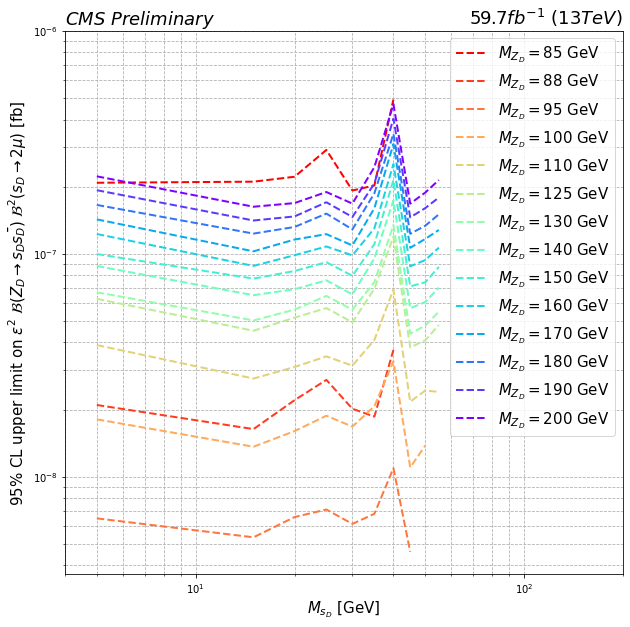

Substituting symbol B from STIXNonUnicode


In [5]:
fig, ax = plt.subplots(figsize=(10,10))
colors=[]
for i in range (14):
    color = plt.cm.rainbow(np.linspace(1,0,14)[i])
    colors.append(color)
ax.plot(msD85, sigBrep85, '--' , linewidth=2, label = r'$M_{Z_{D}}=85$ GeV', c=colors[0])
ax.plot(msD88, sigBrep88, '--' , linewidth=2, label = r'$M_{Z_{D}}=88$ GeV', c=colors[1])
ax.plot(msD95, sigBrep95, '--' ,linewidth=2,label = r'$M_{Z_{D}}=95$ GeV', c=colors[2])
ax.plot(msD100, sigBrep100, '--' ,linewidth=2,label = r'$M_{Z_{D}}=100$ GeV', c=colors[3])
ax.plot(msD110, sigBrep110, '--' ,linewidth=2,label = r'$M_{Z_{D}}=110$ GeV', c=colors[4])
ax.plot(msD125, sigBrep125, '--' ,linewidth=2,label = r'$M_{Z_{D}}=125$ GeV', c=colors[5])
ax.plot(msD130, sigBrep130, '--' ,linewidth=2,label = r'$M_{Z_{D}}=130$ GeV', c=colors[6])
ax.plot(msD140, sigBrep140, '--' ,linewidth=2,label = r'$M_{Z_{D}}=140$ GeV', c=colors[7])
ax.plot(msD150, sigBrep150, '--' ,linewidth=2,label = r'$M_{Z_{D}}=150$ GeV', c=colors[8])
ax.plot(msD160, sigBrep160, '--' ,linewidth=2,label = r'$M_{Z_{D}}=160$ GeV', c=colors[9])
ax.plot(msD170, sigBrep170, '--' ,linewidth=2,label = r'$M_{Z_{D}}=170$ GeV', c=colors[10])
ax.plot(msD180, sigBrep180, '--' ,linewidth=2,label = r'$M_{Z_{D}}=180$ GeV', c=colors[11])
ax.plot(msD190, sigBrep190, '--' ,linewidth=2,label = r'$M_{Z_{D}}=190$ GeV', c=colors[12])
ax.plot(msD200, sigBrep200, '--' ,linewidth=2,label = r'$M_{Z_{D}}=200$ GeV', c=colors[13])

ax.loglog()
ax.set_ylim([0,1.00E-06])
ax.set_xlim([4,200])



plt.grid(True, which="both", ls="--")
# ax.grid(self, b=None, which='major', axis='both', **kwargs)
plt.rcParams.update({'font.size': 15})
ax.set_xlabel(r'$M_{s_{D}}$ [GeV]', fontsize=15)
ax.set_ylabel(r'95% CL upper limit on $\epsilon^{2} \ \mathcal{B}(Z_{D} \rightarrow s_{D} \bar{s_{D})}  \ \mathcal{B}^{2} (s_{D} \rightarrow 2\mu) $ [fb]', fontsize=15)
# plt.title(r'$CMS\ Preliminary\ 59.97fb^{-1} \ (13 TeV)$') 
plt.title(r'$CMS \ Preliminary$', loc='left')
plt.title(r'$59.7fb^{-1} \ (13 TeV)$', loc='right')
plt.legend(bbox_to_anchor=(1, 1),fontsize=15)
# ax.set_facecolor('black')
plt.show()
fig.savefig('Limits_epsilon.pdf')

In [6]:
x1=np.average(sigBrep85)
x2=np.average(sigBrep95)
x3=np.average(sigBrep100)
x4=np.average(sigBrep110)
x5=np.average(sigBrep125)
x6=np.average(sigBrep130)
x7=np.average(sigBrep140)
x8=np.average(sigBrep150)
x9=np.average(sigBrep160)
x10=np.average(sigBrep170)
x11=np.average(sigBrep180)
x12=np.average(sigBrep190)
x13=np.average(sigBrep200)
x14=np.average(sigBrep88)

print(x14)
print(x2)


2.3182017908857158e-08
6.750093096844553e-09


In [7]:
MZD=np.array([85, 88, 89.18, 93.18, 95, 100, 110, 125, 130, 140, 150, 160, 170, 180, 190, 200])
MZD1=[85, 88, 95, 100, 110, 125, 130, 140, 150, 160, 170, 180, 190, 200]
x=np.array([x1, x14, 1.60490338E-08, 7.9E-09, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13])
x1=[x1, x14, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13]
# 89.18, 93.18
# 2.16E-08,1.36E-08
print(x)
xsq=np.sqrt(x)
xsq1=np.sqrt(x1)
# print(xsq)
# for i in range (14):
#     if MZD[i] <= 95 & MZD[i] >= 85:
#         f = InterpolatedUnivariateSpline(MZD, x, k=1)
# MZD1=np.array([88, 95])
# x15=np.array([x14, x2])
# def func(MZD1, a, b):
#     vec = []
#     for ii in range(len(MZD1)):
# #         vec.append(a * x[ii] + b )
#          vec.append(a *(MZD1[ii])+b)
    
#     return vec 
# popt, pcov = curve_fit(func, MZD1, x15)
# fitLine = func(x15, *popt)

[2.59773382e-07 2.31820179e-08 1.60490338e-08 7.90000000e-09
 6.75009310e-09 1.79575198e-08 3.43656720e-08 5.81307461e-08
 6.49377898e-08 8.20879912e-08 9.89158718e-08 1.18545848e-07
 1.41325408e-07 1.63863289e-07 1.89158568e-07 2.19428144e-07]


Substituting symbol B from STIXNonUnicode
Substituting symbol B from STIXNonUnicode


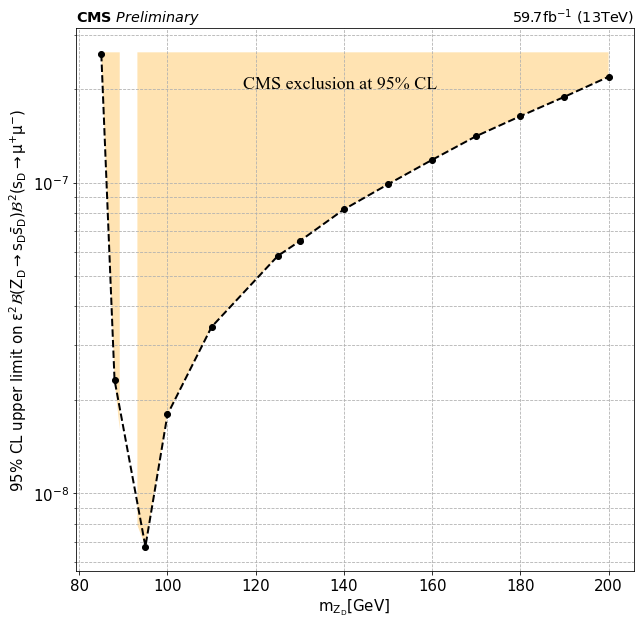

Substituting symbol B from STIXNonUnicode


In [8]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.plot(MZD1, x1, '--ok',linewidth=2, label = r'$M_{Z_{D}}$ GeV', c="black")
# ax1.loglog()
ax1.set_yscale('log')
# plt.xscale("log")
# plt.yscale("log")
# ax1.set_ylim([0,1.00E-06])
# ax1.set_xlim([4,200])
plt.grid(True, which="both", ls="--")
# ax.grid(self, b=None, which='major', axis='both', **kwargs)
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman"
ax1.set_xlabel(r'$\mathrm{m_{Z_{D}} [GeV]}$ ')
ax1.set_ylabel(r'95% CL upper limit on $\mathrm{\epsilon^{2}  \mathcal{B}(Z_{D} \rightarrow s_{D} \bar{s}_{D})  \mathcal{B}^{2} (s_{D} \rightarrow \mu^{+} \mu^{-})} $')
# plt.title(r'$CMS\ Preliminary\ 59.97fb^{-1} \ (13 TeV)$') 
plt.title(r'$\mathbf{CMS} \ Preliminary$', loc='left')
plt.title(r'$\mathrm{59.7 fb^{-1}} \ \mathrm{(13 TeV)}$', loc='right')
ax1.text(0.3, 0.91, "CMS exclusion at 95% CL", transform=ax1.transAxes, fontsize=18, verticalalignment='top')
# plt.tight_layout()
# f = InterpolatedUnivariateSpline((MZD >= 88) & (MZD <= 95),x ,k=1)

ax1.fill_between(MZD,x, 2.63e-07, where = (MZD >= 85) & (MZD <= 89.18),facecolor="orange",alpha=0.30)
ax1.fill_between(MZD,x, 2.63e-07, where = (MZD >= 93.18) & (MZD <= 200),facecolor="orange",alpha=0.30)

# plt.fill_between(MZD1, 2e-07, func(MZD1, *popt), interpolate=True,
#                  where=((MZD1>=89) &
#                         (MZD1<=95)))

# plt.legend(bbox_to_anchor=(1, 1))
# ax.set_facecolor('black')
plt.show()
fig.savefig('Limits_epsilon_ave_sD.pdf')

Substituting symbol B from STIXNonUnicode
Substituting symbol B from STIXNonUnicode


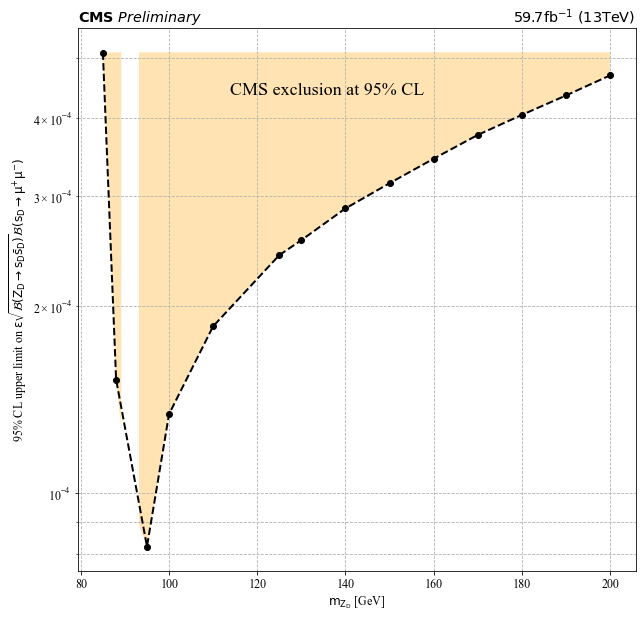

Substituting symbol B from STIXNonUnicode


In [9]:
fig, ax2 = plt.subplots(figsize=(10,10))
ax2.plot(MZD1, xsq1, '--ok' , linewidth=2, label = r'$m_{Z_{D}}$ GeV', c="black")
# ax2.loglog()
plt.yscale("log")
# ax1.set_ylim([0,1.00E-06])
# ax1.set_xlim([4,200])
plt.grid(True, which="both", ls="--")
# ax.grid(self, b=None, which='major', axis='both', **kwargs)
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman"
ax2.set_xlabel(r'$\mathrm{m_{Z_{D}}}$ [GeV]')
ax2.set_ylabel(r'95% CL upper limit on $\mathrm{\epsilon  \sqrt{\mathcal{B}(Z_{D} \rightarrow s_{D} \bar{s}_{D})}  \mathcal{B} (s_{D} \rightarrow \mu^{+} \mu^{-}) }$')
# plt.title(r'$CMS\ Preliminary\ 59.97fb^{-1} \ (13 TeV)$') 
plt.title(r'$\mathrm{\mathbf{CMS}} \ Preliminary}$', loc='left')
ax2.text(0.25, 0.82, "CMS exclusion at 95% CL", transform=ax1.transAxes, fontsize=18, verticalalignment='top')
plt.title(r'$59.7\mathrm{fb^{-1}} \ (13 \mathrm{TeV})$', loc='right')
# plt.fill_between(MZD, xsq, 4.5e-04,facecolor="orange", alpha=0.30)
# ax2.fill_between(MZD,xsq, 4.5e-04, where = (MZD >= 85) & (MZD <= 88),facecolor="orange",alpha=0.30)
# ax2.fill_between(MZD,xsq, 4.5e-04, where = (MZD >= 95) & (MZD <= 200),facecolor="orange",alpha=0.30)
ax2.fill_between(MZD,xsq, 5.1e-04, where = (MZD >= 85) & (MZD <= 89.18),facecolor="orange",alpha=0.30)
ax2.fill_between(MZD,xsq, 5.1e-04, where = (MZD >= 93.18) & (MZD <= 200),facecolor="orange",alpha=0.30)
# plt.legend(bbox_to_anchor=(1, 1))
# ax.set_facecolor('black')
plt.show()
fig.savefig('Limits_sqr_epsilon_ave_sD.pdf')

In [10]:
a=[1,2,4]
print(a)

[1, 2, 4]
